In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
enco = LabelEncoder()
df['species'] = enco.fit_transform(df['species'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[['sepal_length','petal_length','species']]

In [11]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [14]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=2)

In [16]:
clf = LogisticRegression(multi_class='multinomial')

In [17]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [19]:
ypred= clf.predict(X_test)

In [20]:
accuracy_score(y_test,ypred)

0.9666666666666667

In [22]:
pd.DataFrame(confusion_matrix(y_test,ypred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [23]:
query = np.array([[3.4,2.7]])

In [24]:
clf.predict(query)

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [34]:
clf.predict_proba(query)

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [33]:
-(np.log(clf.predict_proba(query)))

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.32026327, 1.29598625, 7.78904825]])

In [35]:
from mlxtend.plotting import plot_decision_regions

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

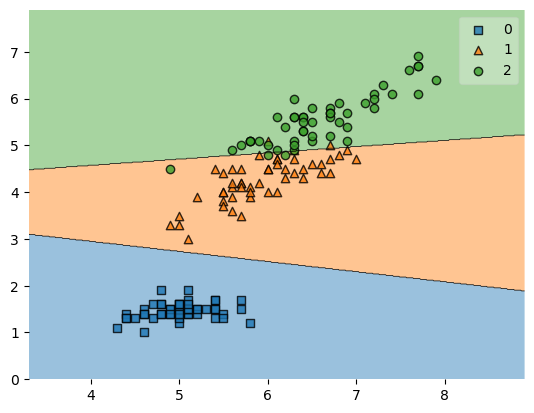

In [39]:
plot_decision_regions(X.values,y.values,clf)